In [244]:
import pandas as pd
import numpy as np
import csv

In [245]:
df_abalone = pd.read_csv('dataset/abalone.csv')
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [246]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


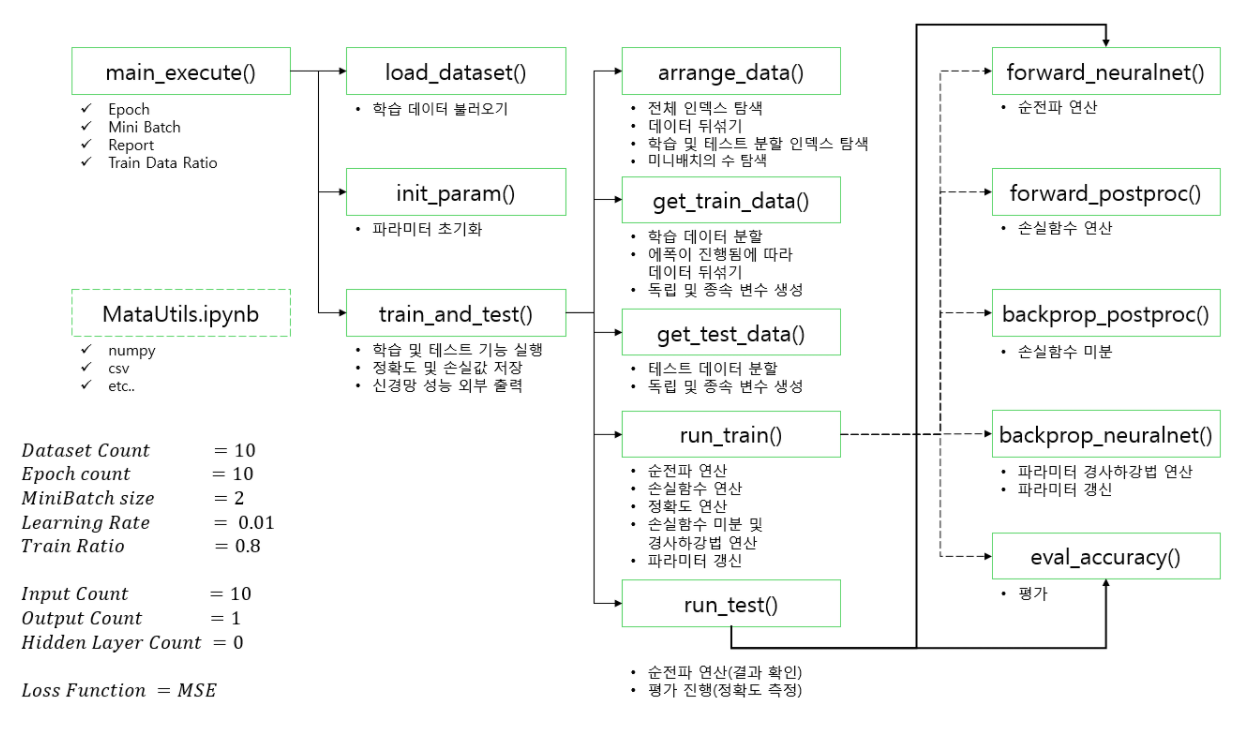

In [247]:
def main_execute(epoch_count=10,mb_size=10,report=2,train_ratio = 0.8):
    load_dataset()
    weight_initial,bias_initial = init_param()
    losses_mean_row,accs_mean_row,final_acc=train_and_test(epoch_count,mb_size,report,train_ratio)
    return weight_initial, bias_initial, losses_mean_row, accs_mean_row,final_acc


In [248]:
def load_dataset():
    with open('dataset/abalone.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows=[]
        
        for row in csvreader :
            rows.append(row)
            
    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 10, 1
    data = np.zeros([len(rows),input_cnt+output_cnt])

    for n, row in enumerate(rows):
        if row[0] == 'M' : data[n,0]=1
        if row[0] == 'F' : data[n,1]=1
        if row[0] == 'I' : data[n,2]=1
        data[n,3:]=row[1:]


In [249]:
%run metautils.ipynb

In [250]:
load_dataset()
print(data)

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      1.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      1.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]


In [251]:
def init_param():
    global weight,bias
    
    weight_initial=[]
    bias_initial=[]
    
    weight=np.random.normal(RND_MEAN,RND_STD,size=[input_cnt,output_cnt])
    bias = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}.".format(bias))
    weight_initial.append(weight)
    bias_initial.append(bias)
    
    return weight_initial,bias_initial

In [252]:
weight_initial,bias_initial=init_param()

Initial Weight Value : 
[[ 1.6483181 ]
 [-1.38084229]
 [-1.01988085]
 [ 1.51194506]
 [ 1.16648081]
 [-0.21040589]
 [ 0.31612552]
 [-0.73052502]
 [ 0.86309217]
 [-1.06029627]]
Initial Bias Value : 
[0.].


In [253]:
mb_size=2
train_ratio = 0.8
print(data.shape)

(4177, 11)


In [254]:
def arrange_data(mb_size,train_ratio):
    global shuffle_map, test_begin_idx
    
    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)
    mini_batch_step_count=int(data.shape[0]*train_ratio)//mb_size
    test_begin_idx = mini_batch_step_count * mb_size
    return mini_batch_step_count

In [255]:
mini_batch_step_count = arrange_data(mb_size=2,train_ratio=0.8)
print("mini batch step count :",mini_batch_step_count)
print("shuffle map :",shuffle_map[:2])
print("test begin index :",test_begin_idx)

mini batch step count : 1670
shuffle map : [ 946 1060]
test begin index : 3340


In [256]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_idx:]]
    return test_data[:,:-output_cnt],test_data[:,-output_cnt:]

In [257]:
test_x, test_y = get_test_data()
print(test_x)
print("="*50)
print(test_y)

[[1.     0.     0.     ... 0.5525 0.243  0.295 ]
 [1.     0.     0.     ... 0.409  0.261  0.322 ]
 [1.     0.     0.     ... 0.3835 0.226  0.325 ]
 ...
 [0.     1.     0.     ... 0.2225 0.129  0.23  ]
 [0.     1.     0.     ... 0.403  0.245  0.355 ]
 [0.     1.     0.     ... 0.258  0.1755 0.28  ]]
[[13.]
 [ 9.]
 [17.]
 [11.]
 [17.]
 [13.]
 [ 9.]
 [11.]
 [10.]
 [ 6.]
 [10.]
 [12.]
 [ 9.]
 [11.]
 [ 6.]
 [ 6.]
 [ 9.]
 [ 8.]
 [ 9.]
 [ 8.]
 [ 9.]
 [11.]
 [ 7.]
 [11.]
 [ 6.]
 [15.]
 [ 9.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [ 7.]
 [10.]
 [10.]
 [ 9.]
 [10.]
 [12.]
 [ 8.]
 [10.]
 [ 5.]
 [10.]
 [10.]
 [ 5.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 9.]
 [17.]
 [ 6.]
 [10.]
 [11.]
 [12.]
 [14.]
 [13.]
 [11.]
 [ 9.]
 [10.]
 [10.]
 [11.]
 [15.]
 [ 9.]
 [ 8.]
 [ 6.]
 [ 8.]
 [13.]
 [10.]
 [ 7.]
 [10.]
 [ 6.]
 [12.]
 [ 9.]
 [10.]
 [ 6.]
 [ 9.]
 [ 8.]
 [ 7.]
 [16.]
 [12.]
 [ 9.]
 [ 9.]
 [12.]
 [ 9.]
 [ 7.]
 [10.]
 [ 9.]
 [ 8.]
 [ 9.]
 [12.]
 [11.]
 [11.]
 [ 9.]
 [19.]
 [10.]
 [ 6.]
 [ 9.]
 [ 8.]
 [15.]
 [ 9.]
 [ 9.]
 [10.]


In [258]:
#n : 미니배치 덩어리 횟수
def get_train_data(mb_size,n):
    if n == 0:
        np.random.shuffle(shuffle_map[:test_begin_idx])
        
    train_data = data[shuffle_map[mb_size*n:mb_size*(n+1)]]
    return train_data[:,:-output_cnt],train_data[:,-output_cnt:]

In [259]:
train_x, train_y = get_train_data(mb_size=2,n=0)
print(train_x)
print("="*50)
print(train_y)

[[1.    0.    0.    0.555 0.45  0.145 0.915 0.4   0.246 0.285]
 [0.    0.    1.    0.435 0.335 0.095 0.298 0.109 0.058 0.115]]
[[11.]
 [ 7.]]


In [260]:
def run_test(x,y):
    accuracy = 100
    return accuracy
run_test(0,0)

100

In [261]:
def run_train(x,y):
    loss = 0
    accuracy = 95
    return loss,accuracy
run_train(0,0)

(0, 95)

In [262]:
def train_and_test(epoch_count,mb_size,report,train_ratio):
    mini_batch_step_count = arrange_data(mb_size,train_ratio)
    
    test_x,test_y=get_test_data()
    
    losses_mean_row=[]
    accs_mean_row = []
    
    for epoch in range(epoch_count):
        losses = []
        accs = []
        for n in range(mini_batch_step_count):
            train_x,train_y=get_train_data(mb_size,n)
            
            loss,acc=run_train(train_x,train_y)
            
            losses.append(loss)
            accs.append(acc)
            
        if report>0 and (epoch + 1)%report==0:
            acc=run_test(test_x,test_y)
            print("Epoch {}:Train - Loss = {:.3f}, Accuracy = {:.3f} / Test - Accuracy = {:.3f}".format(epoch+1,np.mean(losses),np.mean(accs),acc))
        
        losses_mean = np.mean(losses)
        accs_mean = np.mean(accs)*100
        
        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)
        
    final_acc = run_test(test_x,test_y)
    print("="*30, "Final Test","="*30)
    print("\nFinal Accuracy : {:.3f}".format(final_acc))
    
    return losses_mean_row, accs_mean_row, final_acc

In [263]:
result = train_and_test(epoch_count=10,
                       mb_size=2,
                       report=3,
                       train_ratio=0.8)

Epoch 3:Train - Loss = 0.000, Accuracy = 95.000 / Test - Accuracy = 100.000
Epoch 6:Train - Loss = 0.000, Accuracy = 95.000 / Test - Accuracy = 100.000
Epoch 9:Train - Loss = 0.000, Accuracy = 95.000 / Test - Accuracy = 100.000
============================== Final Test ==============================

Final Accuracy : 100.000


In [264]:
def forward_neuralnet(x):
    y_hat = np.matmul(x,weight)+bias
    return y_hat, x

In [265]:
y_hat,_ = forward_neuralnet(train_x)
print("y_hat : \n",y_hat)
print(y_hat.shape)

y_hat : 
 [[ 2.8890362 ]
 [-0.04869878]]
(2, 1)


In [266]:
def forward_postproc(y_hat,y):
    diff=y_hat-y
    square=np.square(diff)
    loss=np.mean(square)
    
    return loss,diff

In [267]:
loss,_ = forward_postproc(y_hat, train_y) #필요없는 변수는 _ 처리
print(loss)

57.73594412268822


In [268]:
train_y

array([[11.],
       [ 7.]])

In [269]:
def eval_accuracy(y_hat,y):
    mdiff=np.mean(np.abs((y_hat-y)/y))
    return 1-mdiff


In [270]:
acc = eval_accuracy(y_hat,train_y)
print("Accuracy : {}".format(np.round(acc*100,3)))

Accuracy : 12.784


In [271]:
def backprop_neuralnet(G_output,x):
    global weight,bias
    
    x_trans = x.transpose()
    G_w = np.matmul(x_trans,G_output)
    G_b = np.sum(G_output,axis=0)
    
    weight -=LEARNING_RATE * G_w
    bias -= LEARNING_RATE * G_b

In [272]:
#W := W-n*X(t)G

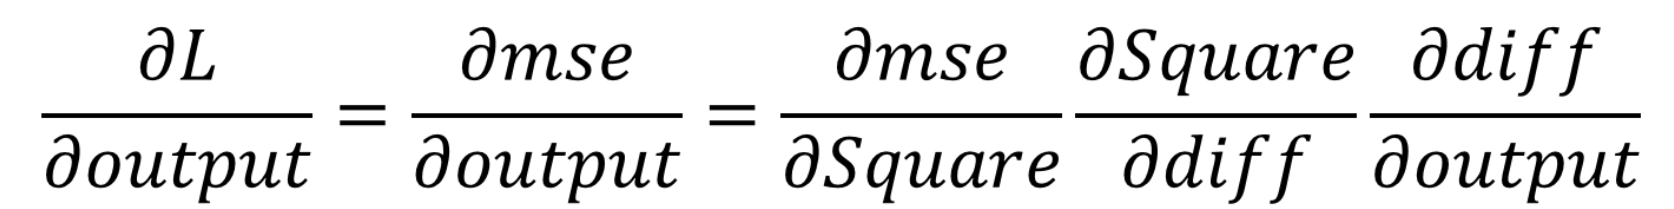

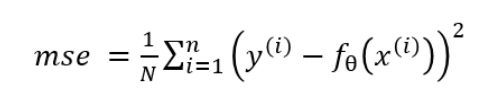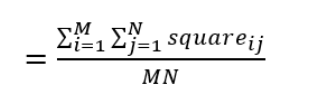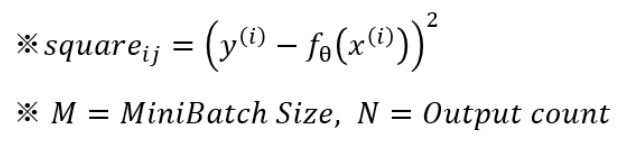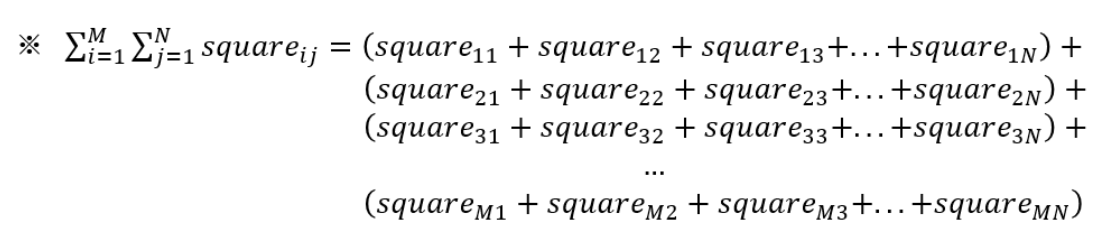

In [273]:
diff = y_hat - train_y
print("diff.shape : ",diff.shape)

square = np.square(diff)

row_count_M = diff.shape[0]
row_count_N = diff.shape[1]

print("row count M :",row_count_M)
print("row count N :",row_count_N)
MSE = (square[0][0]+square[1][0])/(row_count_M*row_count_N)
print("MSE : ",MSE)

diff.shape :  (2, 1)
row count M : 2
row count N : 1
MSE :  57.73594412268822


In [274]:
def backprop_postproc(diff):
    M_N = diff.shape
    
    g_mse_square = np.ones(M_N)/np.prod(M_N)  #성분을 곱해서 출력
    g_square_diff = 2*diff
    g_diff_output = 1
    
    G_diff = g_mse_square * g_square_diff
    G_output = G_diff * g_diff_output
    
    return G_output

In [275]:
def run_train(x,y): #보조정보 x,diff. 이름은 자유
    y_hat, aux_nn_x = forward_neuralnet(x)
    loss, aux_pp_diff = forward_postproc(y_hat, y)
    
    accuracy = eval_accuracy(y_hat,y)
    
    G_output = backprop_postproc(aux_pp_diff)
    
    backprop_neuralnet(G_output, aux_nn_x)
    
    return loss, accuracy

In [276]:
def run_test(x,y):
    y_hat,_ = forward_neuralnet(x)
    accuracy = eval_accuracy(y_hat,y)
    
    return accuracy

In [277]:
weight_initial, bias_initial, losses_mean_row, accs_mean_row,final_acc = main_execute(epoch_count=1000,mb_size=32,report=50,train_ratio = 0.8)



Initial Weight Value : 
[[-1.52697921]
 [-0.96255632]
 [ 1.80783466]
 [-1.38820467]
 [-1.28114844]
 [ 0.44793123]
 [-0.56967147]
 [ 0.23223176]
 [-0.32294461]
 [ 0.14650771]]
Initial Bias Value : 
[0.].
Epoch 50:Train - Loss = 4.888, Accuracy = 0.838 / Test - Accuracy = 0.842
Epoch 100:Train - Loss = 4.860, Accuracy = 0.840 / Test - Accuracy = 0.841
Epoch 150:Train - Loss = 4.843, Accuracy = 0.839 / Test - Accuracy = 0.832
Epoch 200:Train - Loss = 4.815, Accuracy = 0.840 / Test - Accuracy = 0.839
Epoch 250:Train - Loss = 4.806, Accuracy = 0.840 / Test - Accuracy = 0.842
Epoch 300:Train - Loss = 4.821, Accuracy = 0.840 / Test - Accuracy = 0.844
Epoch 350:Train - Loss = 4.804, Accuracy = 0.840 / Test - Accuracy = 0.833
Epoch 400:Train - Loss = 4.817, Accuracy = 0.839 / Test - Accuracy = 0.844
Epoch 450:Train - Loss = 4.816, Accuracy = 0.839 / Test - Accuracy = 0.847
Epoch 500:Train - Loss = 4.806, Accuracy = 0.840 / Test - Accuracy = 0.842
Epoch 550:Train - Loss = 4.813, Accuracy = 0.839

In [278]:
print("weight \n", weight)
print("bias \n", bias)

weight 
 [[  1.04054671]
 [  0.90717539]
 [  0.23560068]
 [  0.09206001]
 [ 11.15315555]
 [  9.11021229]
 [  9.13011698]
 [-19.73232027]
 [-11.20772757]
 [  8.71813945]]
bias 
 [2.86502365]


In [279]:
new_x = [0, 1, 0, 0.685, 0.545, 0.18, 1.42, 0.674, 0.392, 0.5]

y_pred = forward_neuralnet(new_x)
print("y_pred: ", y_pred[0])

y_pred:  [11.18439089]


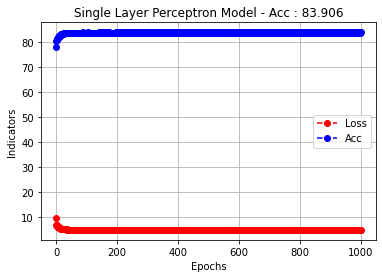

In [280]:
import matplotlib.pyplot as plt

plt.plot(losses_mean_row, '--o', color = 'red', label = 'Loss')
plt.plot(accs_mean_row, '--o', color = 'blue', label = 'Acc')

plt.title("Single Layer Perceptron Model - Acc : {:.3f}".\
          format(final_acc * 100))

plt.xlabel('Epochs')
plt.ylabel('Indicators')
plt.grid()
plt.legend()
plt.show()